In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
train = pd.read_csv("Train.csv")
test = pd.read_csv("Test.csv")

Variable definitions

Global Human Settlement Layer. Based on data from the GHSL project.

1. 'ghsl_water_surface' - the fraction of land within 5km of the cluster that is classified as water surface
2. 'ghsl_built_pre_1975' - the fraction of land within 5km of the cluster that is classified as built-up before 1975
3. 'ghsl_built_1975_to_1990'
4. 'ghsl_built_1990_to_2000',
5. 'ghsl_built_2000_to_2014',
6. 'ghsl_not_built_up' - land that was never built up
7. 'ghsl_pop_density' - population density for the surrounding area (5km radius)
Landcover: based on the Copernicus Global Land Cover Layers (https://developers.google.com/earth-engine/datasets/catalog/COPERNICUS_Landcover_100m_Proba-V-C3_Global)

8. 'Landcover_crops_fraction' - the fraction of land within 5km of the cluster that is classified as cropland
9. 'landcover_urban_fraction' - the fraction of land within 5km of the cluster that is classified as urban
10. 'Landcover_water_permanent_10km_fraction' - the fraction of land within 10km of the cluster that is classified as           permanent water
11. 'Landcover_water_seasonal_10km_fraction' - the fraction of land within 10km of the cluster that is classified as seasonal water
12. 'Nighttime_lights' - a classic indicator of economic activity
13. 'Dist_to_capital' - distance to the countries capital
14. 'Dist_to_shoreline - distance to the nearest ocean shoreline
15. ‘urban_or_rural’: Is the cluster in an urban (‘U’) or rural (‘R’) setting


In [3]:
train.head()

,ID,country,year,urban_or_rural,ghsl_water_surface,ghsl_built_pre_1975,ghsl_built_1975_to_1990,ghsl_built_1990_to_2000,ghsl_built_2000_to_2014,ghsl_not_built_up,ghsl_pop_density,landcover_crops_fraction,landcover_urban_fraction,landcover_water_permanent_10km_fraction,landcover_water_seasonal_10km_fraction,nighttime_lights,dist_to_capital,dist_to_shoreline,Target
0,ID_AAIethGy,Ethiopia,2016,R,0.0,0.000000,0.000000,0.000055,0.000536,0.999408,12.146134,25.489659,0.879484,0.000000,0.000000,0.000000,278.788451,769.338378,0.132783
1,ID_AAYiaCeL,Ethiopia,2005,R,0.0,0.000000,0.000110,0.000000,0.000018,0.999872,113.806716,64.136053,0.601427,0.000000,0.005427,0.000000,200.986978,337.135243,0.004898
2,ID_AAdurmKj,Mozambique,2009,R,0.0,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,4.400096,0.131900,0.000000,0.003078,0.000000,642.594208,169.913773,0.097320
3,ID_AAgNHles,Malawi,2015,R,0.0,0.000141,0.000181,0.000254,0.000228,0.999195,5.213320,25.379371,2.017136,11.293841,0.131035,0.000000,365.349451,613.591610,0.304107
4,ID_AAishfND,Guinea,2012,U,0.0,0.011649,0.017560,0.017383,0.099875,0.853533,31.734661,5.081620,22.815984,0.005047,0.130475,1.461894,222.867189,192.926363,0.605328


In [4]:
test.head()

,ID,country,year,urban_or_rural,ghsl_water_surface,ghsl_built_pre_1975,ghsl_built_1975_to_1990,ghsl_built_1990_to_2000,ghsl_built_2000_to_2014,ghsl_not_built_up,ghsl_pop_density,landcover_crops_fraction,landcover_urban_fraction,landcover_water_permanent_10km_fraction,landcover_water_seasonal_10km_fraction,nighttime_lights,dist_to_capital,dist_to_shoreline
0,ID_AAcismbB,Democratic Republic of Congo,2007,R,0.000000,0.000000,0.000000,0.000523,0.000131,0.999347,0.660758,0.990942,0.132264,0.069055,0.032627,0.000000,1249.294720,1364.592100
1,ID_AAeBMsji,Democratic Republic of Congo,2007,U,0.000000,0.004239,0.000238,0.001227,0.002860,0.991437,6.441547,5.461365,0.452400,0.000000,0.000000,0.000000,821.019579,1046.028681
2,ID_AAjFMjzy,Uganda,2011,U,0.007359,0.525682,0.132795,0.095416,0.042375,0.196373,587.516458,2.881811,87.387991,3.248483,3.950374,60.070041,3.620455,906.057334
3,ID_AAmMOEEC,Burkina Faso,2010,U,0.000000,0.000089,0.000036,0.001519,0.001358,0.996997,35.141762,33.878927,4.166437,0.000000,0.130727,1.333999,109.493969,775.139189
4,ID_ABguzDxp,Zambia,2007,R,0.000000,0.000138,0.000623,0.000615,0.002961,0.995663,3.442449,33.491994,3.437129,0.133563,0.128997,0.502203,133.643319,835.591501


In [5]:
train.shape, test.shape

((21454, 19), (7194, 18))

In [6]:
train.isna().sum()

ID                                         0
country                                    0
year                                       0
urban_or_rural                             0
ghsl_water_surface                         0
ghsl_built_pre_1975                        0
ghsl_built_1975_to_1990                    0
ghsl_built_1990_to_2000                    0
ghsl_built_2000_to_2014                    0
ghsl_not_built_up                          0
ghsl_pop_density                           0
landcover_crops_fraction                   0
landcover_urban_fraction                   0
landcover_water_permanent_10km_fraction    0
landcover_water_seasonal_10km_fraction     0
nighttime_lights                           0
dist_to_capital                            0
dist_to_shoreline                          0
Target                                     0
dtype: int64

In [7]:
test.isna().sum()

ID                                         0
country                                    0
year                                       0
urban_or_rural                             0
ghsl_water_surface                         0
ghsl_built_pre_1975                        0
ghsl_built_1975_to_1990                    0
ghsl_built_1990_to_2000                    0
ghsl_built_2000_to_2014                    0
ghsl_not_built_up                          0
ghsl_pop_density                           0
landcover_crops_fraction                   0
landcover_urban_fraction                   0
landcover_water_permanent_10km_fraction    0
landcover_water_seasonal_10km_fraction     0
nighttime_lights                           0
dist_to_capital                            0
dist_to_shoreline                          0
dtype: int64

<AxesSubplot:ylabel='Frequency'>

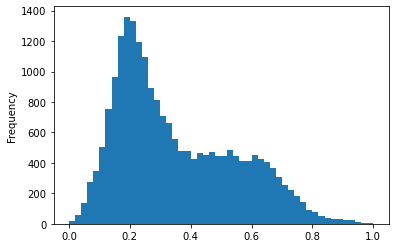

In [8]:
train.Target.plot(kind='hist', bins=50)

<AxesSubplot:title={'center':'Target'}, xlabel='urban_or_rural'>

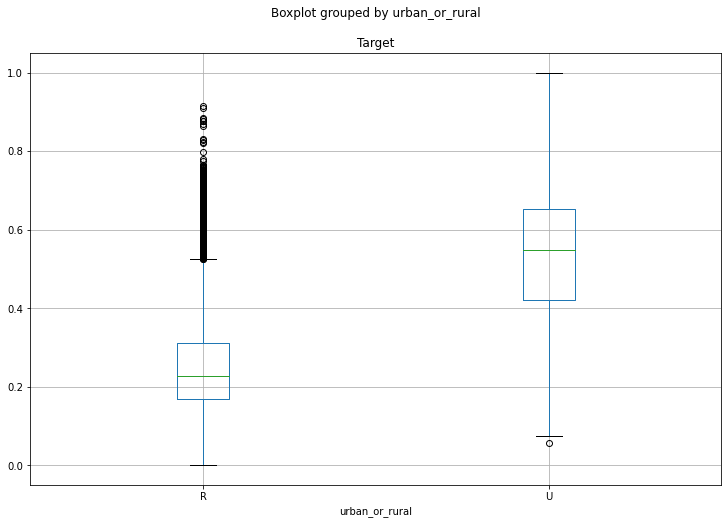

In [9]:
# Looking at the wealth distribution for urban vs rural
train.boxplot(by='urban_or_rural', column='Target', figsize=(12, 8))

In [10]:
train['urban_or_rural'].unique()

array(['R', 'U'], dtype=object)

<AxesSubplot:>

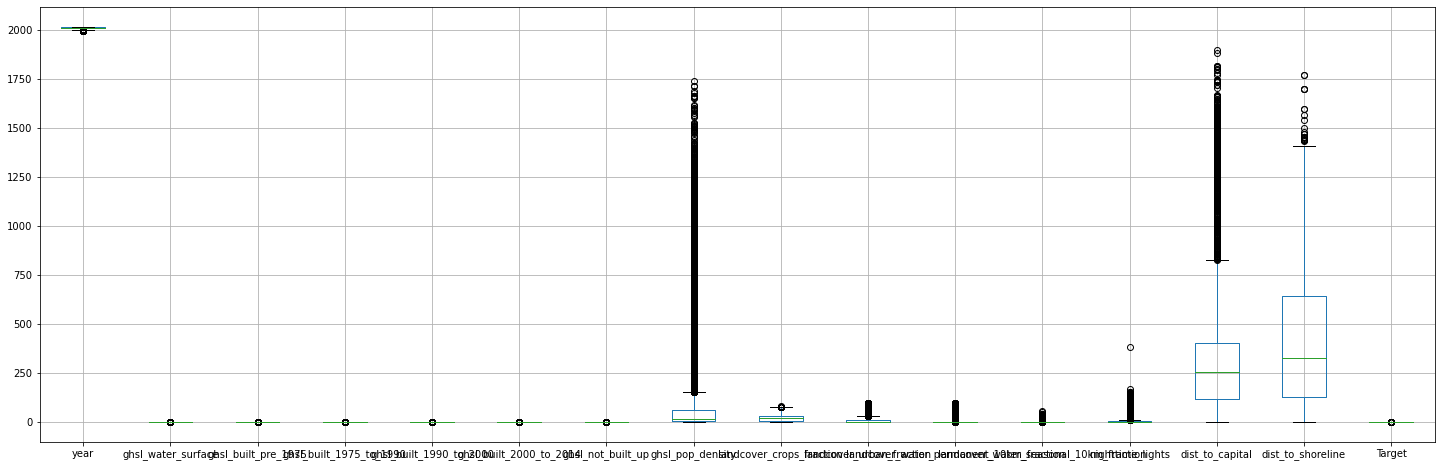

In [11]:
plt.figure(figsize=(25,8))
train.boxplot()

In [12]:
train['urban_or_rural']  = pd.get_dummies(train.urban_or_rural)
test['urban_or_rural'] = pd.get_dummies(test.urban_or_rural)

In [13]:
train.country = pd.get_dummies(train.country)
test.country = pd.get_dummies(test.country)

In [14]:
train.head()

,ID,country,year,urban_or_rural,ghsl_water_surface,ghsl_built_pre_1975,ghsl_built_1975_to_1990,ghsl_built_1990_to_2000,ghsl_built_2000_to_2014,ghsl_not_built_up,ghsl_pop_density,landcover_crops_fraction,landcover_urban_fraction,landcover_water_permanent_10km_fraction,landcover_water_seasonal_10km_fraction,nighttime_lights,dist_to_capital,dist_to_shoreline,Target
0,ID_AAIethGy,0,2016,1,0.0,0.000000,0.000000,0.000055,0.000536,0.999408,12.146134,25.489659,0.879484,0.000000,0.000000,0.000000,278.788451,769.338378,0.132783
1,ID_AAYiaCeL,0,2005,1,0.0,0.000000,0.000110,0.000000,0.000018,0.999872,113.806716,64.136053,0.601427,0.000000,0.005427,0.000000,200.986978,337.135243,0.004898
2,ID_AAdurmKj,0,2009,1,0.0,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,4.400096,0.131900,0.000000,0.003078,0.000000,642.594208,169.913773,0.097320
3,ID_AAgNHles,0,2015,1,0.0,0.000141,0.000181,0.000254,0.000228,0.999195,5.213320,25.379371,2.017136,11.293841,0.131035,0.000000,365.349451,613.591610,0.304107
4,ID_AAishfND,0,2012,0,0.0,0.011649,0.017560,0.017383,0.099875,0.853533,31.734661,5.081620,22.815984,0.005047,0.130475,1.461894,222.867189,192.926363,0.605328


In [15]:
test.head()

,ID,country,year,urban_or_rural,ghsl_water_surface,ghsl_built_pre_1975,ghsl_built_1975_to_1990,ghsl_built_1990_to_2000,ghsl_built_2000_to_2014,ghsl_not_built_up,ghsl_pop_density,landcover_crops_fraction,landcover_urban_fraction,landcover_water_permanent_10km_fraction,landcover_water_seasonal_10km_fraction,nighttime_lights,dist_to_capital,dist_to_shoreline
0,ID_AAcismbB,0,2007,1,0.000000,0.000000,0.000000,0.000523,0.000131,0.999347,0.660758,0.990942,0.132264,0.069055,0.032627,0.000000,1249.294720,1364.592100
1,ID_AAeBMsji,0,2007,0,0.000000,0.004239,0.000238,0.001227,0.002860,0.991437,6.441547,5.461365,0.452400,0.000000,0.000000,0.000000,821.019579,1046.028681
2,ID_AAjFMjzy,0,2011,0,0.007359,0.525682,0.132795,0.095416,0.042375,0.196373,587.516458,2.881811,87.387991,3.248483,3.950374,60.070041,3.620455,906.057334
3,ID_AAmMOEEC,0,2010,0,0.000000,0.000089,0.000036,0.001519,0.001358,0.996997,35.141762,33.878927,4.166437,0.000000,0.130727,1.333999,109.493969,775.139189
4,ID_ABguzDxp,0,2007,1,0.000000,0.000138,0.000623,0.000615,0.002961,0.995663,3.442449,33.491994,3.437129,0.133563,0.128997,0.502203,133.643319,835.591501


In [16]:
final = test.ID
final.head()

0    ID_AAcismbB
1    ID_AAeBMsji
2    ID_AAjFMjzy
3    ID_AAmMOEEC
4    ID_ABguzDxp
Name: ID, dtype: object

In [17]:
# train.ID = pd.get_dummies(train.ID, drop_first=True)
# test.ID = pd.get_dummies(test.ID, drop_first=True)

train = train.drop('ID',1)
test = test.drop('ID',1)

In [18]:
train.head()

,country,year,urban_or_rural,ghsl_water_surface,ghsl_built_pre_1975,ghsl_built_1975_to_1990,ghsl_built_1990_to_2000,ghsl_built_2000_to_2014,ghsl_not_built_up,ghsl_pop_density,landcover_crops_fraction,landcover_urban_fraction,landcover_water_permanent_10km_fraction,landcover_water_seasonal_10km_fraction,nighttime_lights,dist_to_capital,dist_to_shoreline,Target
0,0,2016,1,0.0,0.000000,0.000000,0.000055,0.000536,0.999408,12.146134,25.489659,0.879484,0.000000,0.000000,0.000000,278.788451,769.338378,0.132783
1,0,2005,1,0.0,0.000000,0.000110,0.000000,0.000018,0.999872,113.806716,64.136053,0.601427,0.000000,0.005427,0.000000,200.986978,337.135243,0.004898
2,0,2009,1,0.0,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,4.400096,0.131900,0.000000,0.003078,0.000000,642.594208,169.913773,0.097320
3,0,2015,1,0.0,0.000141,0.000181,0.000254,0.000228,0.999195,5.213320,25.379371,2.017136,11.293841,0.131035,0.000000,365.349451,613.591610,0.304107
4,0,2012,0,0.0,0.011649,0.017560,0.017383,0.099875,0.853533,31.734661,5.081620,22.815984,0.005047,0.130475,1.461894,222.867189,192.926363,0.605328


In [19]:
X = train.drop('Target',1)
y = train.Target

In [20]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split, cross_val_score

In [21]:
# import classification algorithm 
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import HistGradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR

In [22]:
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=.25, random_state=0)

In [23]:
# models = {
#     "SVM": SVR(),
#     "KNN": KNeighborsRegressor(),
#     "RF": RandomForestRegressor(),
#     "GB": GradientBoostingRegressor(),
#     "DTC": DecisionTreeRegressor(),
#     "HGB": HistGradientBoostingRegressor(),
#     "LR": LinearRegression()
# }



# for model_name, model in models.items():
#     print("Train {}".format(model_name))
#     # cross_val_score for each classifier
# #     scores = cross_val_score(model, X_train, y_train, cv=5, scoring=metrics.mean_squared_error)
#     model.fit(X_train, y_train)
#     scores = cross_val_score(model, X_train, y_train, cv=5)
#     print(scores)
#     scores_average = (sum(scores))/(len(scores))
#     print(scores_average)

# #     print("List of scores for {}: {}".format(model_name, scores))
# #     print("The mean score for {}: {}".format(model_name, scores.mean()))
#     print("-------------The End------------------")

In [24]:
# from catboost import CatBoostRegressor


In [25]:
# model = CatBoostRegressor()
# model.fit(X,y)

In [26]:
# lightgbm algorithm
import lightgbm as lgb
model = lgb.LGBMRegressor(
    num_leaves=31,
    max_depth=-1,
    learning_rate=0.2,
    n_estimators=700
)
model.fit(X_train,y_train)
mean_squared_error(y_test, model.predict(X_test), squared=False)

0.09327372503773516

In [27]:
# Histogradient boosting algorithm
model1 = HistGradientBoostingRegressor()
model1.fit(X,y)

HistGradientBoostingRegressor()

In [28]:
mean_squared_error(y_test, model1.predict(X_test), squared=True)

0.00685052453065295

In [29]:
 y_pred = model1.predict(test)

In [30]:
from sklearn.model_selection import GridSearchCV

In [31]:
my_model = HistGradientBoostingRegressor()


# Optimize model paramaters 

param_grid = {'learning_rate': [0.1, 0.3, 0.05],
              'max_iter':[300,500,700],
        'max_depth': [3, 4, 5,7],
            
        }
model_hgb = GridSearchCV(my_model, param_grid,cv=5, verbose=3)

#train to find the best parameters 
model_hgb.fit(X_train, y_train)


Fitting 5 folds for each of 36 candidates, totalling 180 fits
[CV] learning_rate=0.1, max_depth=3, max_iter=300 ....................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  learning_rate=0.1, max_depth=3, max_iter=300, score=0.763, total=   1.6s
[CV] learning_rate=0.1, max_depth=3, max_iter=300 ....................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.6s remaining:    0.0s


[CV]  learning_rate=0.1, max_depth=3, max_iter=300, score=0.754, total=   1.9s
[CV] learning_rate=0.1, max_depth=3, max_iter=300 ....................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    3.5s remaining:    0.0s


[CV]  learning_rate=0.1, max_depth=3, max_iter=300, score=0.751, total=   1.4s
[CV] learning_rate=0.1, max_depth=3, max_iter=300 ....................
[CV]  learning_rate=0.1, max_depth=3, max_iter=300, score=0.766, total=   1.4s
[CV] learning_rate=0.1, max_depth=3, max_iter=300 ....................
[CV]  learning_rate=0.1, max_depth=3, max_iter=300, score=0.770, total=   1.9s
[CV] learning_rate=0.1, max_depth=3, max_iter=500 ....................
[CV]  learning_rate=0.1, max_depth=3, max_iter=500, score=0.765, total=   1.9s
[CV] learning_rate=0.1, max_depth=3, max_iter=500 ....................
[CV]  learning_rate=0.1, max_depth=3, max_iter=500, score=0.754, total=   2.1s
[CV] learning_rate=0.1, max_depth=3, max_iter=500 ....................
[CV]  learning_rate=0.1, max_depth=3, max_iter=500, score=0.751, total=   1.8s
[CV] learning_rate=0.1, max_depth=3, max_iter=500 ....................
[CV]  learning_rate=0.1, max_depth=3, max_iter=500, score=0.766, total=   1.7s
[CV] learning_rate=0.

[Parallel(n_jobs=1)]: Done 180 out of 180 | elapsed:  7.4min finished


GridSearchCV(cv=5, estimator=HistGradientBoostingRegressor(),
             param_grid={'learning_rate': [0.1, 0.3, 0.05],
                         'max_depth': [3, 4, 5, 7],
                         'max_iter': [300, 500, 700]},
             verbose=3)

In [32]:
model_hgb.best_params_

{'learning_rate': 0.1, 'max_depth': 7, 'max_iter': 500}

In [35]:
best_model = HistGradientBoostingRegressor(learning_rate= 0.1, max_depth= 7,max_iter= 500 )

#train the model                
best_model.fit(X_train, y_train)

#predict in the validate set 
y_pred = best_model.predict(X_test)
mean_squared_error(y_test, best_model.predict(X_test), squared=False)

0.0910587523615667

In [ ]:
# sub = pd.DataFrame({'ID':final, "Target":y_pred})
# sub.to_csv("submission_df",index=False)

In [ ]:
import xgboost as xgb
xgb_model = xgb.XGBRegressor()
xgb_model.fit(X_train,y_train)
mean_squared_error(y_test, xgb_model.predict(X_test), squared=False)